# Basic Architecture

-> input layer (no nodes)
 
-> each will have an associated weight value and bias 

-> enters a series of hidden layers where it is processed through each neurons activation function 

-> output layer 


Every layer in between the input and output layer is a hidden layer

The entire arrangement is known as the architecture of the network

The number of layers in th network, besides the input, is the depth.

Layers are fully connected if each node of one layer is connected to each node of the next layer, without any connections between non-consecutive layers.

The structure of artificial neural networks are said to loosley be based on the workings of the human brain.

For each node, inputs are multiplied by their respective weights and summed together.

Each node is also assocaited with a bias

# Activation Functions

The activation function will take the weighted sum of each connection entering a specific node of a layer, and will perform a calculation to transform this weighted sum into a certain number within a defined range of values (e.g. between 0 and 1).The activation function transforms the input values of the layer nodes and introduces the non-linearity into the model which is necessary for the model to be trained and to learn the relationships between the data. The function essentially determines the extent to which a neuron should be active, ultimately deciding whether the input from a specific neuron is important or relevant to the prediction task at hand. Without the activation function, the network would just become a form of linear regression. Non-linearity allows the network nodes to learn more complex features. 

https://www.v7labs.com/blog/neural-networks-activation-functions

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/



## Heaviside Step function (Perceptron)

A simple activation function, returning a 1 if the output is non-negative and a 0 if the output is negative. 

\begin{equation}
S(x) = \theta(x) = \frac{\text{sgn}(x)+1}{2} =\begin{cases}
1 & \text{if $x>0$}\\
1/2 & \text{if $x=0$}\\
0 & \text{else}
\end{cases}
\end{equation}

Text(0.5, 0, 'x')

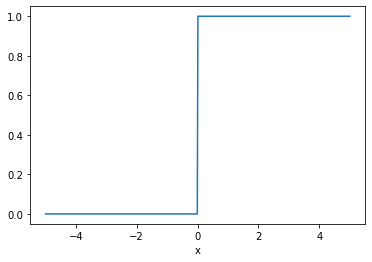

In [1]:
# heaviside step function code
import matplotlib.pyplot as plt
import numpy as np
myx = np.linspace(-5,5, 500)
plt.plot(myx, (np.sign(myx)+1)/2)
plt.xlabel("x")

## Sigmoid

Sigmoid is an activtation function that takes the weighted sums of of each connection entering a a node of a layer and and will output a continuous value between 0 and 1, depending on how negative or positive the weighted sum is. If the weighted sum is very positive, the output will be a value closer to 1. If it is more negative, the output the wlll be a value closer to 0. A weighted sum of 0 results in an output of 0.5, or midway within this smooth function. Sigmoid can be slow to perform. 

\begin{equation}
S(x) = \frac{1}{1+\exp(-x)}
\end{equation}

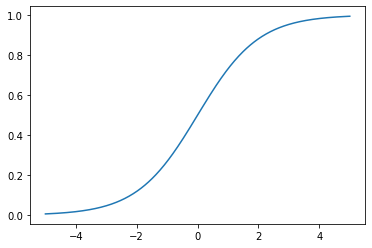

In [6]:
# sigmoid code

myx = np.linspace(-5,5, 500)
plt.plot(myx, 1/(1+np.exp(-myx)))

## ReLU

This function is the 'rectified linear unit activation function' and works by taking the sum of weigths from th e previous layer and either returns a 0 if the output is below 0, or returns the output itself if it is greater than 0 (positive). The function will actually be linear for positive values, but overall will be non linear due to negative values being returned as 0. Because of this half linear and half non linear output of the ReLU function, it can be referred to as a piecewise linear function. With this activation function, the more positive the sum of weights value is, the more 'activated' the network node/neuron should be. Also, because certain neurons will be set to 0, and thus deactivated, the ReLU function is computationally efficient to perform. *Note - Dying relu problem*

\begin{equation}
\text{ReLU}(x) = \max(0,x)
\end{equation}


In [9]:
# ReLU code

#if input > 0:
#    return input
#else:
#    return 0

def relu(x):
    return max(0.0, x)

## tanh

The tan hyberbolical function is similar to the sigmoid function. It is a non-linear function that takes the weighted sums of of each connection entering a a node of a layer and transforms this value into a continuous value between -1 and 1, depending on how negative or positive the weighted sum is. It is therefore centred around 0.

```python
plt.axhline(0,c="k")
plt.plot(myx, np.tanh(myx),label="tanh")
    
plt.ylim([-1.1,2])
plt.legend()
```

## Softmax

The softmax function is most often used within the output layer of the model. This function transforms the values generated by the output layer into a probability value. This allows the final output from a network to be interpeted as a probability distirbution. This is useful in situations where we have a more complex classification problem, involving more than just two possible classes or labels. Each output will be assigned a probability distribution, with the highest probability value corresponding to the class (output) which the model beleives it is seeing from the input. For example, when the model is shown an image which has the label index of 5, the highest probability value should be in position 5 of the ouput nodes if it has made the correct prediction. All elements of the probability distribution output should sum to 1.


\begin{equation} 
o_i^{k+1} = \frac{e^{i_i^{k}}}{\sum_j e^{i_j^{k}}}
\end{equation}

It is the exponential function of the current output value, divided by the sum of the exponential function of each output. 

This makes multi-class classification easier.



In [24]:
# simple example 
import numpy as np

# example probability values
output = np.array([0.8,0.5,0.3])

probs = np.zeros((1,3))
for i in range(len(output)):
    
    p = np.exp(output[i])/(sum(np.exp(output)))
    
    probs[0,i] = p 

In [29]:
probs

array([[0.42601251, 0.31559783, 0.25838965]])

In [28]:
np.sum(probs)

1.0